In [1]:
from WikiAnalyzer import WikiAnalyzer
from Translator import GoogleTranslationProvider, FaceBookTranslatorProvider
from ArticleProcessor import ArticleProcessor
from Comparator import SimpleDistanceComparator, PCAComparator, CCAComparator
from PyPlotHelper import plot_similarity_hist, plot_similarity_hist_simple_with_pca_pairwise, plot_similarity_heatmap_simple_with_pca_pairwise
from transformers import BertTokenizer, BertModel
from EmbeddingService import EmbeddingService, FastTextEmbeddingService, GloveEmbeddingService, SentenceTransformerEmbeddingService, BertEmbeddingService
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexeybykov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexeybykov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexeybykov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexeybykov/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
translator_de_en = GoogleTranslationProvider("de", "en")
translator_en_de = GoogleTranslationProvider("en", "de")

In [3]:
def get_similarity_matrix_with_simple_comparator(first_article,
                          second_article,
                          first_lang,
                          second_lang,
                          base_lang,
                          translator,
                          model, approach, splitting):

  article_processor = ArticleProcessor(
        first_article=first_article,
        second_article=second_article,
        first_lang=first_lang,
        second_lang=second_lang,
        base_lang=base_lang,
        translator=translator
    )

  comparator = SimpleDistanceComparator(metric="average",
                                        approach=approach,
                                        #tokenizer=tokenizer,
                                        model=model,
                                        splitting=splitting,
                                        doPlots=True)

  wikianalyzer = WikiAnalyzer(article_processor=article_processor, comparator=comparator)

  return wikianalyzer.analyze()

In [4]:
def get_similarity_matrix_with_PCA_comparator(first_article,
                          second_article,
                          first_lang,
                          second_lang,
                          base_lang,
                          translator,
                          model,
                          topic_num,
                          metric, approach, splitting):

  article_processor = ArticleProcessor(
        first_article=first_article,
        second_article=second_article,
        first_lang=first_lang,
        second_lang=second_lang,
        base_lang=base_lang,
        translator=translator
    )

  comparator = PCAComparator(metric=metric,
                             approach=approach,
                             #tokenizer=tokenizer,
                             model=model,
                             topic_num = topic_num,
                             splitting=splitting,
                             doPlots=True)

  wikianalyzer = WikiAnalyzer(article_processor=article_processor, comparator=comparator)

  return wikianalyzer.analyze()

In [5]:
def get_similarity_matrix_with_CCA_comparator(first_article,
                          second_article,
                          first_lang,
                          second_lang,
                          base_lang,
                          translator,
                          model,
                          topic_num,
                          metric, approach, splitting, doPlots):

  article_processor = ArticleProcessor(
        first_article=first_article,
        second_article=second_article,
        first_lang=first_lang,
        second_lang=second_lang,
        base_lang=base_lang,
        translator=translator
    )

  comparator = CCAComparator(metric=metric,
                             approach=approach,
                             #tokenizer=tokenizer,
                             model=model,
                             topic_num = topic_num,
                             splitting = splitting,
                             doPlots=doPlots)

  wikianalyzer = WikiAnalyzer(article_processor=article_processor, comparator=comparator)

  return wikianalyzer.analyze()

In [6]:
fasttext_service = FastTextEmbeddingService('/Users/alexeybykov/Downloads/wiki-news-300d-1M-subword.vec', binary=False)

In [6]:
sentence_transformer_service = SentenceTransformerEmbeddingService('sentence-transformers/all-mpnet-base-v2')

In [8]:
glove_service = GloveEmbeddingService('/Users/alexeybykov/Downloads/glove/glove.6B.300d.txt')

In [9]:
bert_service = BertEmbeddingService(model_name='bert-base-uncased')

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl
dimension of the sim matrix:  torch.Size([20, 21])


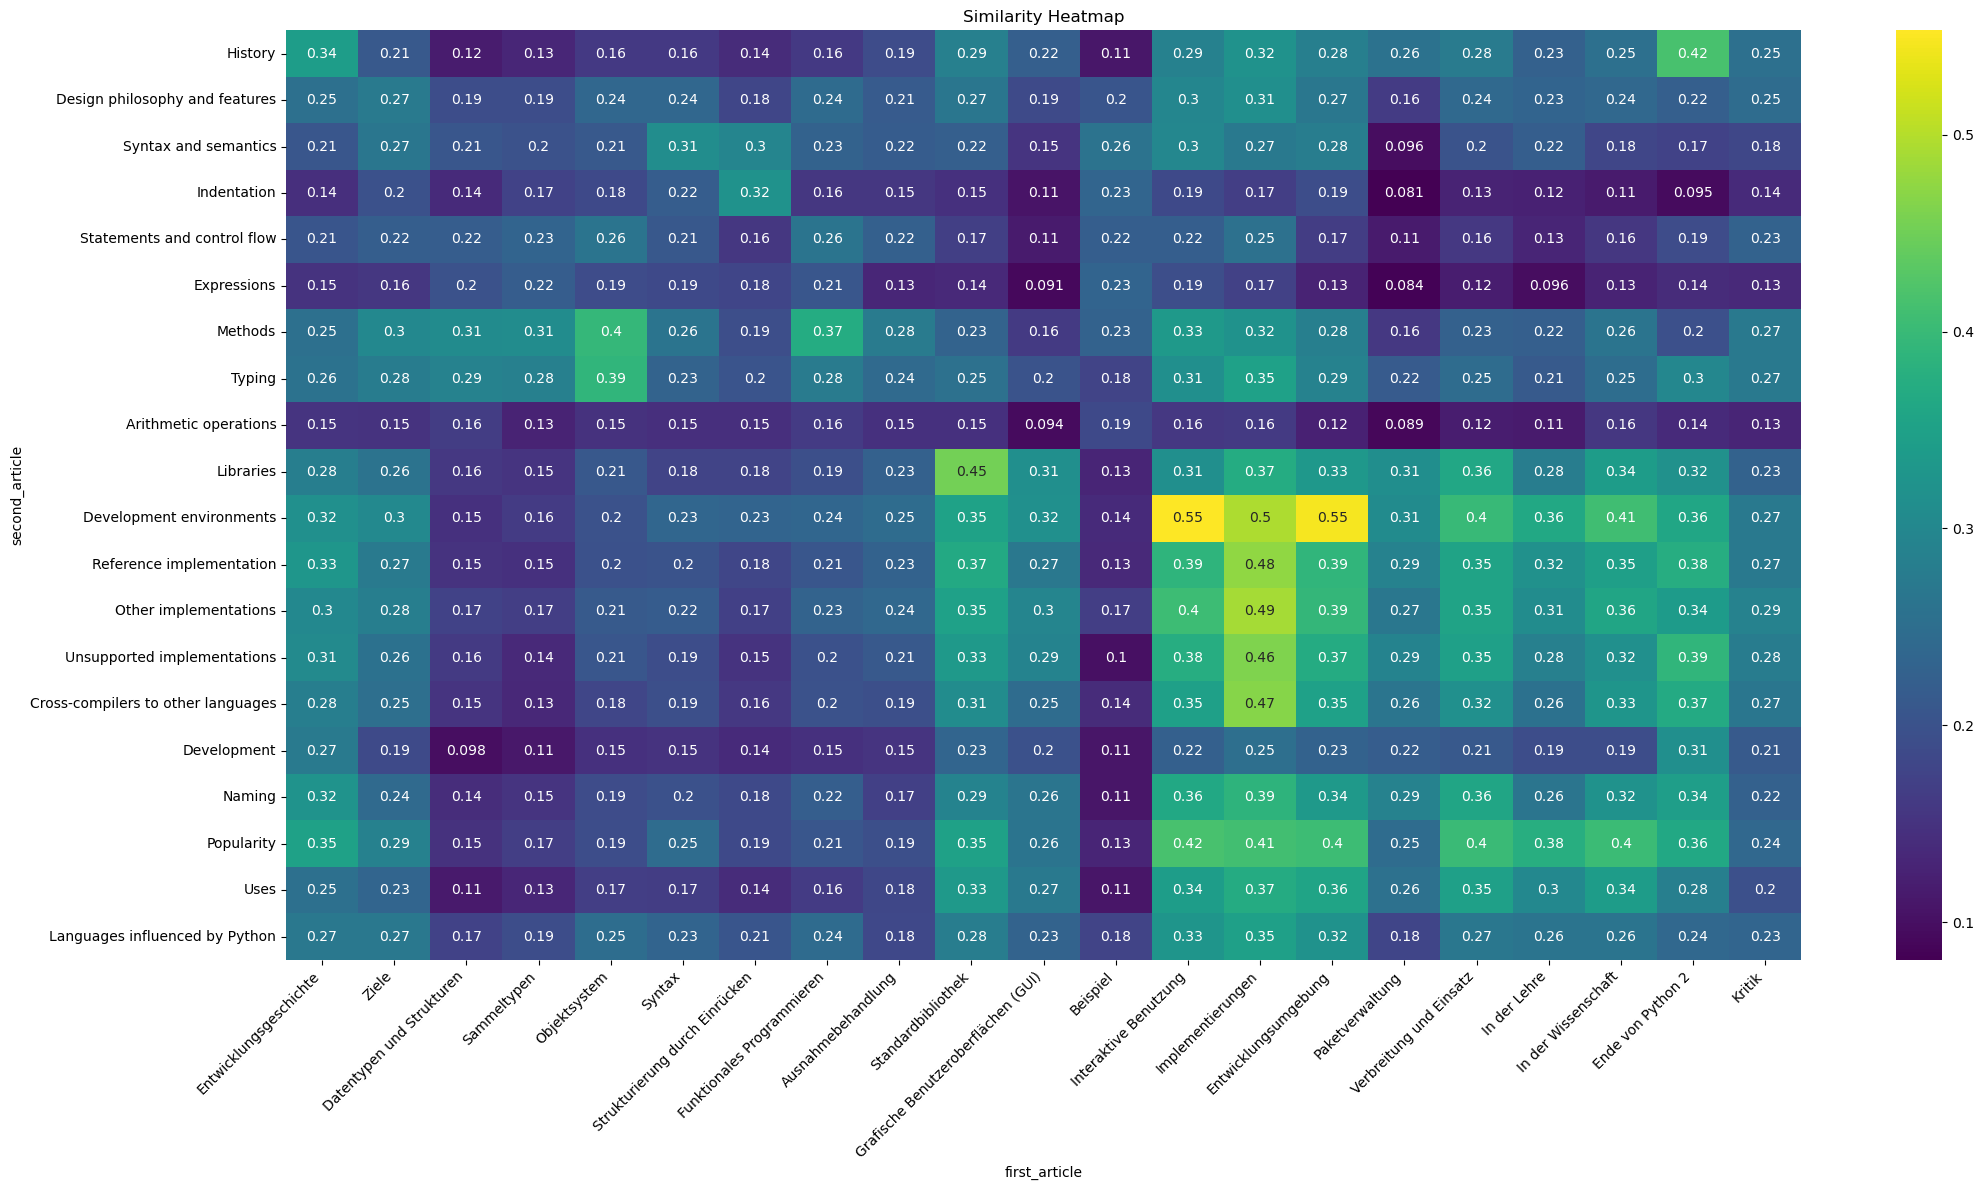

['Entwicklungsgeschichte', 'Ziele', 'Datentypen und Strukturen', 'Sammeltypen', 'Objektsystem', 'Syntax', 'Strukturierung durch Einrücken', 'Funktionales Programmieren', 'Ausnahmebehandlung', 'Standardbibliothek', 'Grafische Benutzeroberflächen (GUI)', 'Beispiel', 'Interaktive Benutzung', 'Implementierungen', 'Entwicklungsumgebung', 'Paketverwaltung', 'Verbreitung und Einsatz', 'In der Lehre', 'In der Wissenschaft', 'Ende von Python 2', 'Kritik']


In [14]:
result_pyth_de_en_simple_cos_sent = get_similarity_matrix_with_simple_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, sentence_transformer_service, "subsets_to_subsets", "sentence-wise")



In [16]:
result_pyth_cos_de_ensimple_cos_sent_a_t_s = get_similarity_matrix_with_simple_comparator("Python (programming language)", "Python (Programmiersprache)", 'en', 'de', 'en', translator_de_en, sentence_transformer_service, "article_to_subset", "sentence-wise")



caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl
caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl


In [15]:
result_pyth_de_en_simple_cos_sent

([('Development environments', 'Interaktive Benutzung', 0.5530555248260498),
  ('Other implementations', 'Implementierungen', 0.4889957904815674),
  ('Reference implementation', 'Implementierungen', 0.47511711716651917)],
 [('Arithmetic operations', 'Beispiel', 0.18522824347019196),
  ('Expressions', 'Beispiel', 0.23083758354187012),
  ('Statements and control flow', 'Objektsystem', 0.26339608430862427)])

In [17]:
result_pyth_cos_de_ensimple_cos_sent_a_t_s

[('Datentypen und Strukturen', 0.16186554729938507),
 ('Weitere Grafiken', 0.1637592911720276),
 ('Sammeltypen', 0.16604287922382355)]

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


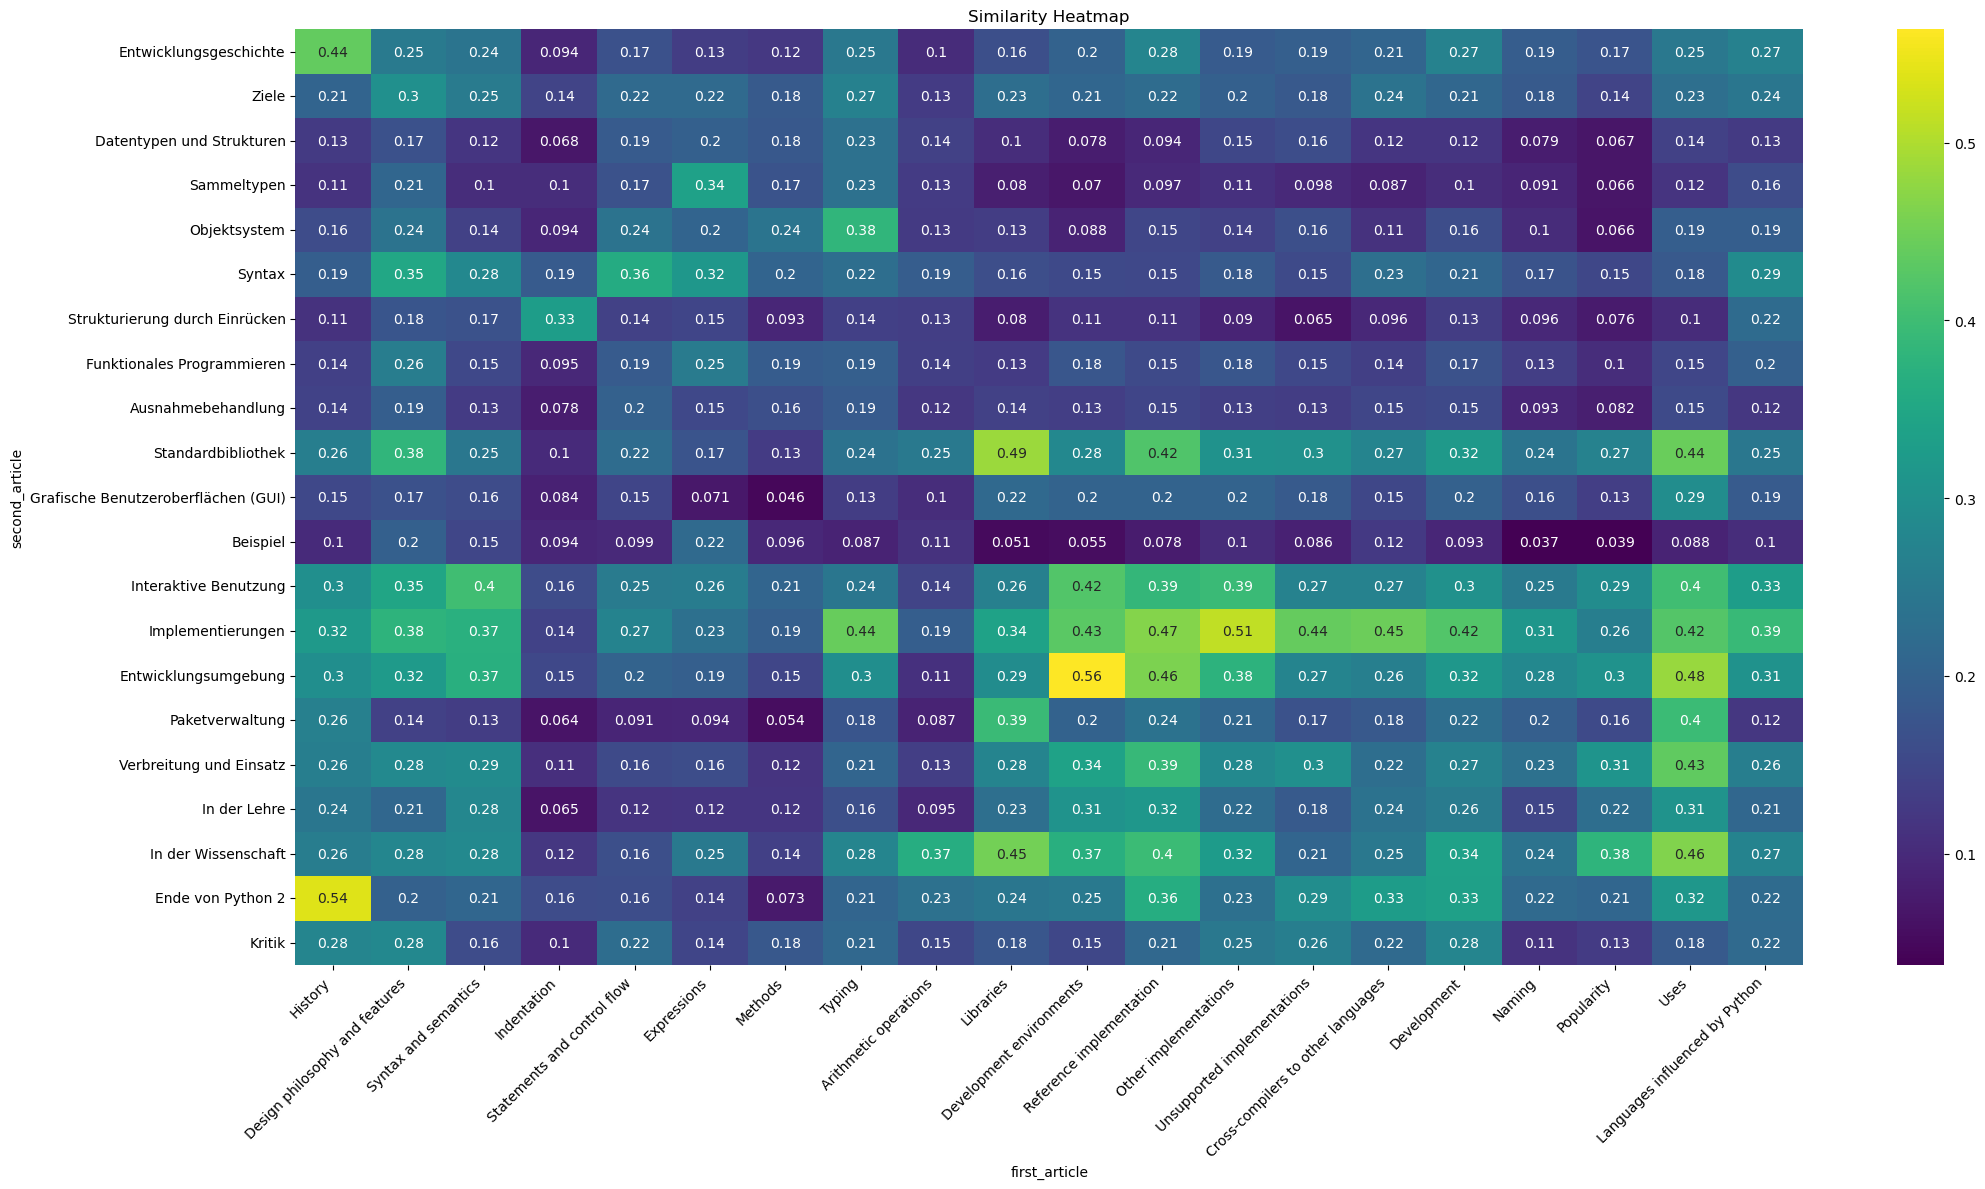

['History', 'Design philosophy and features', 'Syntax and semantics', 'Indentation', 'Statements and control flow', 'Expressions', 'Methods', 'Typing', 'Arithmetic operations', 'Libraries', 'Development environments', 'Reference implementation', 'Other implementations', 'Unsupported implementations', 'Cross-compilers to other languages', 'Development', 'Naming', 'Popularity', 'Uses', 'Languages influenced by Python']


In [14]:
result_pyth_de_en_pca_pairwise_sent = get_similarity_matrix_with_PCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, sentence_transformer_service, 0.5, "pairwise", "subsets_to_subsets", "sentence-wise")


In [15]:
result_pyth_de_en_pca_pairwise_sent

([('Entwicklungsumgebung', 'Development environments', 0.5638543963432312),
  ('Ende von Python 2', 'History', 0.5372889041900635),
  ('Implementierungen', 'Other implementations', 0.5131762027740479)],
 [('Ausnahmebehandlung', 'Statements and control flow', 0.19779294729232788),
  ('Beispiel', 'Expressions', 0.21649174392223358),
  ('Datentypen und Strukturen', 'Typing', 0.23251371085643768)])

caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl
caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl


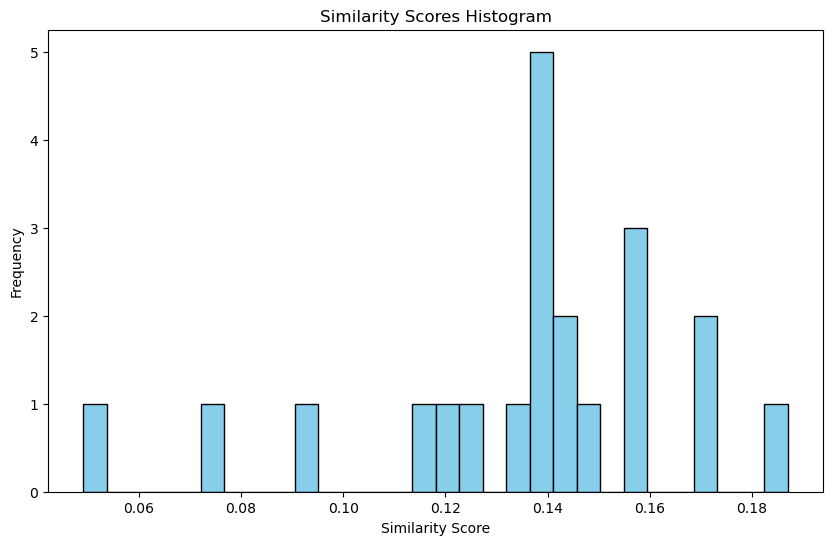

In [16]:
result_pyth_de_en_pca_a_to_s_sent_d = get_similarity_matrix_with_PCA_comparator("Python (programming language)", "Python (Programmiersprache)", 'en', 'de', 'en', translator_de_en, sentence_transformer_service, 0.75, "pairwise", "article_to_subset", "sentence-wise")



In [17]:
result_pyth_de_en_pca_a_to_s_sent_d

[('Beispiel', 0.04913195222616196),
 ('Paketverwaltung', 0.07497403770685196),
 ('Grafische Benutzeroberflächen (GUI)', 0.09223279356956482)]

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


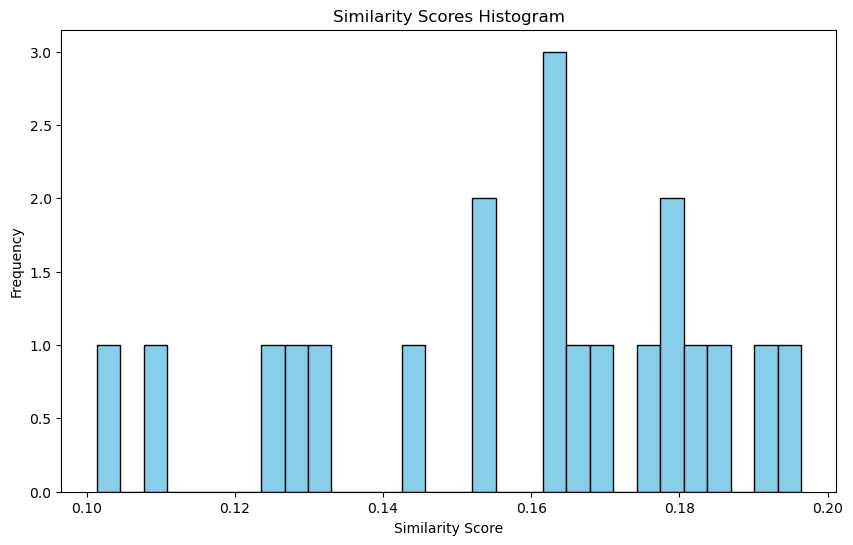

In [18]:
result_pyth_de_en_pca_a_to_s_sent_e = get_similarity_matrix_with_PCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, sentence_transformer_service, 1.0, "pairwise", "article_to_subset", "sentence-wise")



In [19]:
result_pyth_de_en_pca_a_to_s_sent_e

[('Indentation', 0.1013636663556099),
 ('Arithmetic operations', 0.11067316681146622),
 ('Methods', 0.12378497421741486)]

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


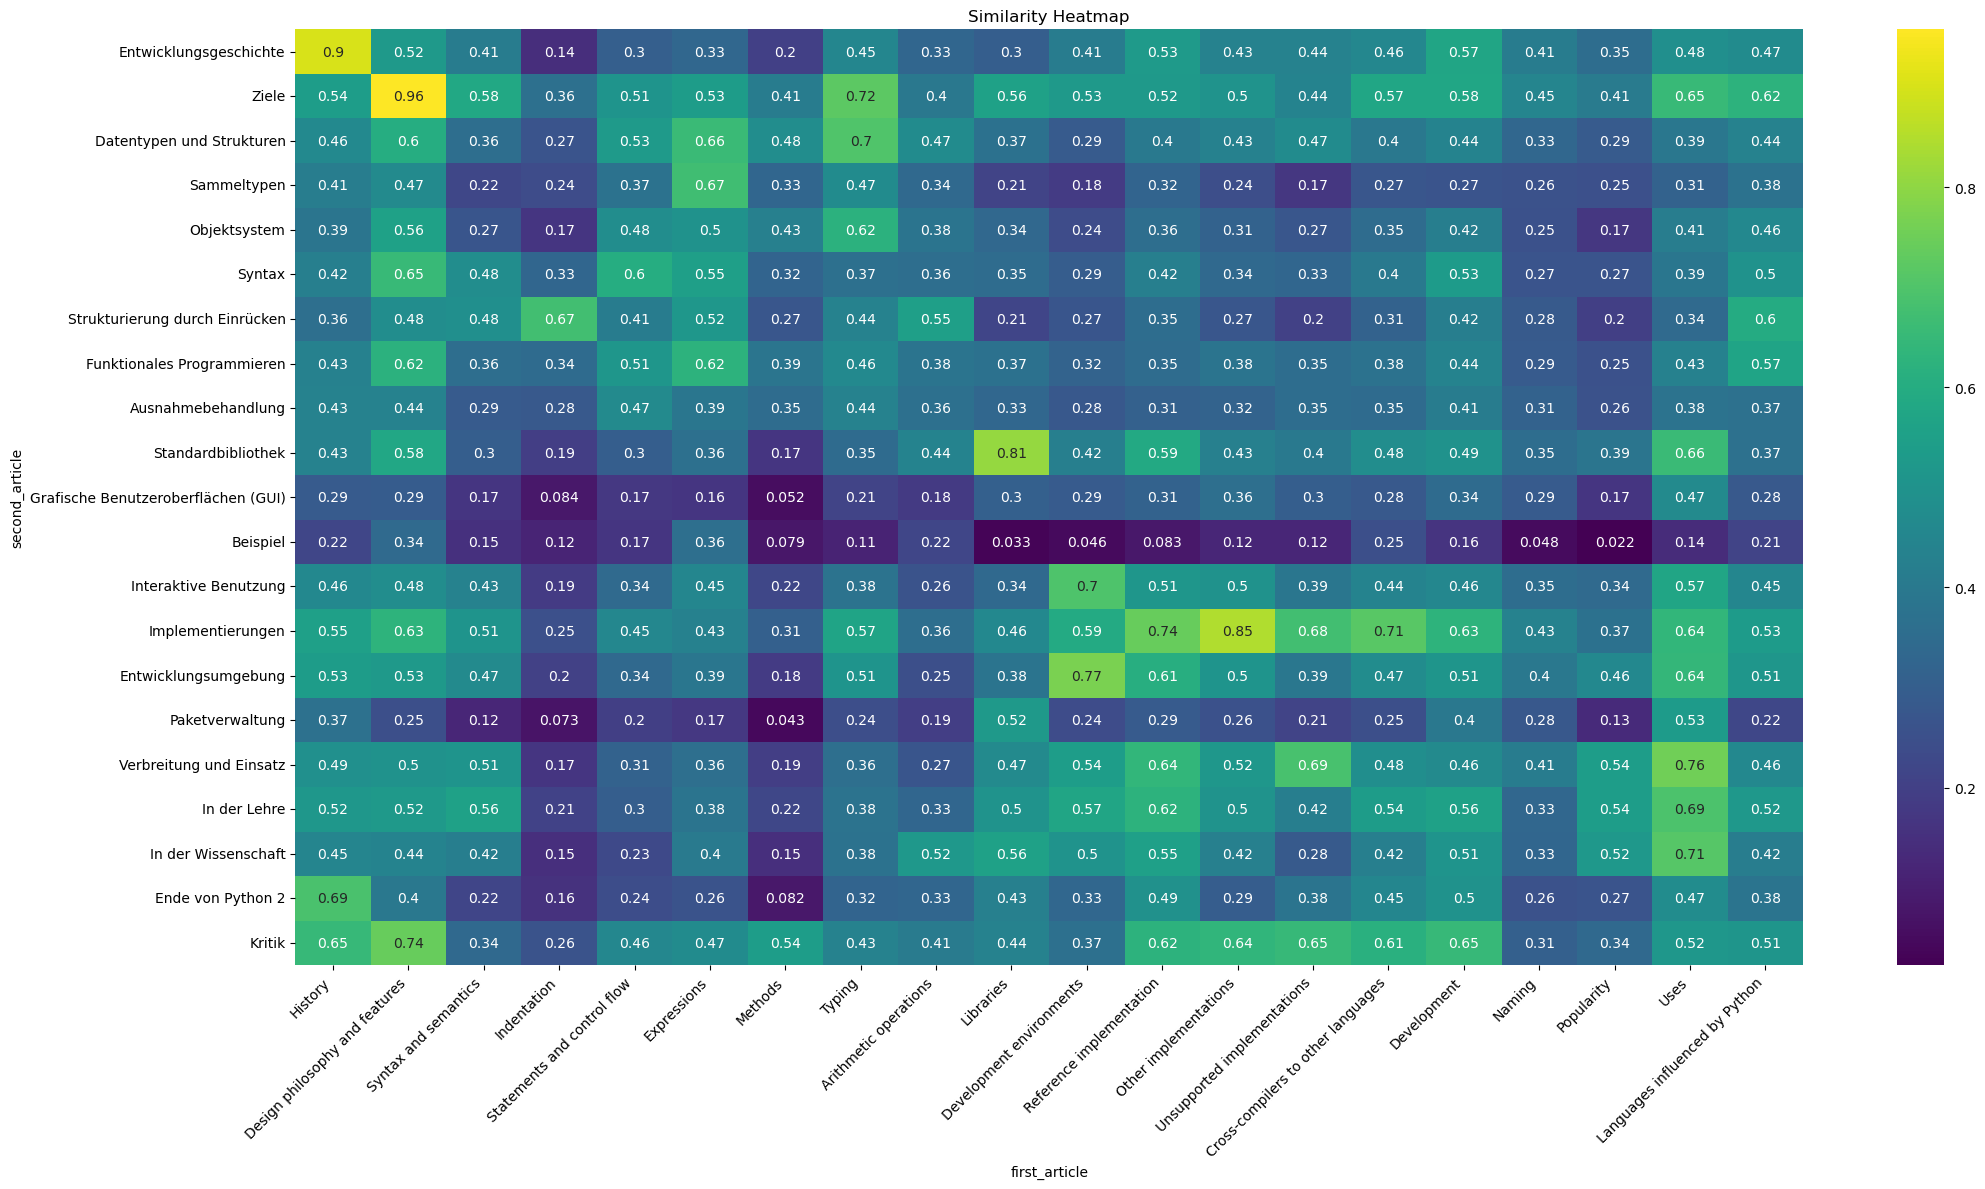

['History', 'Design philosophy and features', 'Syntax and semantics', 'Indentation', 'Statements and control flow', 'Expressions', 'Methods', 'Typing', 'Arithmetic operations', 'Libraries', 'Development environments', 'Reference implementation', 'Other implementations', 'Unsupported implementations', 'Cross-compilers to other languages', 'Development', 'Naming', 'Popularity', 'Uses', 'Languages influenced by Python']


In [20]:
result_pyth_de_en_cca_paarwise_sent = get_similarity_matrix_with_CCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, sentence_transformer_service, 0.5, "pairwise", "subsets_to_subsets", "sentence-wise", True)



In [21]:
result_pyth_de_en_cca_paarwise_sent

([('Ziele', 'Design philosophy and features', 0.9579592347145081),
  ('Entwicklungsgeschichte', 'History', 0.9029433131217957),
  ('Implementierungen', 'Other implementations', 0.8482731580734253)],
 [('Beispiel', 'Expressions', 0.3607422709465027),
  ('Ausnahmebehandlung', 'Statements and control flow', 0.46644553542137146),
  ('Grafische Benutzeroberflächen (GUI)', 'Uses', 0.46701711416244507)])

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


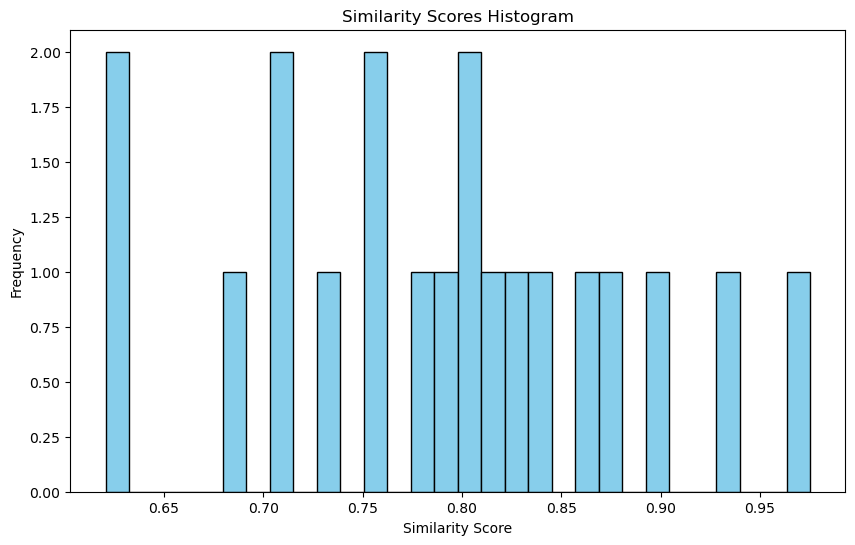

In [22]:
result_pyth_de_en_cca_a_t_s_sent_d = get_similarity_matrix_with_CCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, sentence_transformer_service, 0.5, "pairwise", "article_to_subset", "sentence-wise", True)


In [23]:
result_pyth_de_en_cca_a_t_s_sent_d

[('Naming', 0.6205109357833862),
 ('Methods', 0.6229439973831177),
 ('Popularity', 0.6831079125404358)]

caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl
caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl


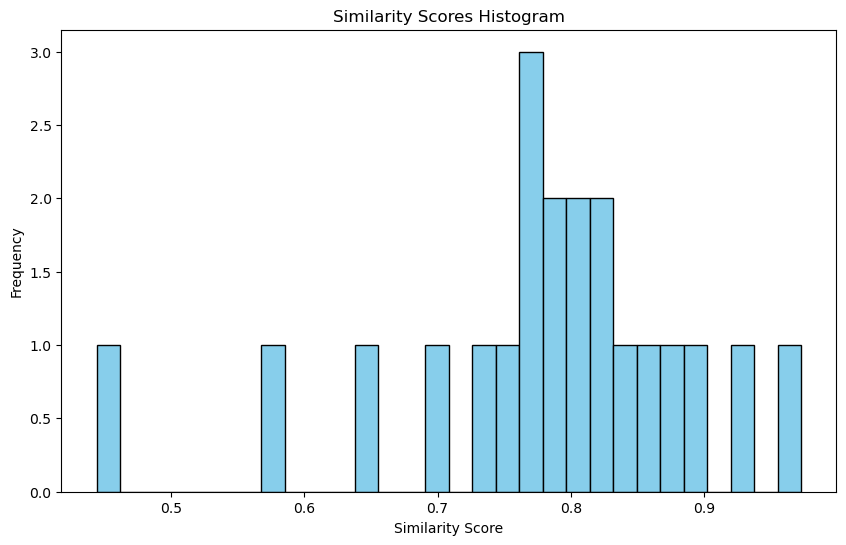

In [24]:
result_pyth_de_en_cca_a_t_s_sent_e = get_similarity_matrix_with_CCA_comparator("Python (programming language)", "Python (Programmiersprache)", 'en', 'de', 'en', translator_de_en, sentence_transformer_service, 0.55, "pairwise", "article_to_subset", "sentence-wise", True)


In [25]:
result_pyth_de_en_cca_a_t_s_sent_e

[('Beispiel', 0.44407379627227783),
 ('Grafische Benutzeroberflächen (GUI)', 0.5828384160995483),
 ('Ausnahmebehandlung', 0.6536116003990173)]

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl
dimension of the sim matrix:  torch.Size([23, 22])


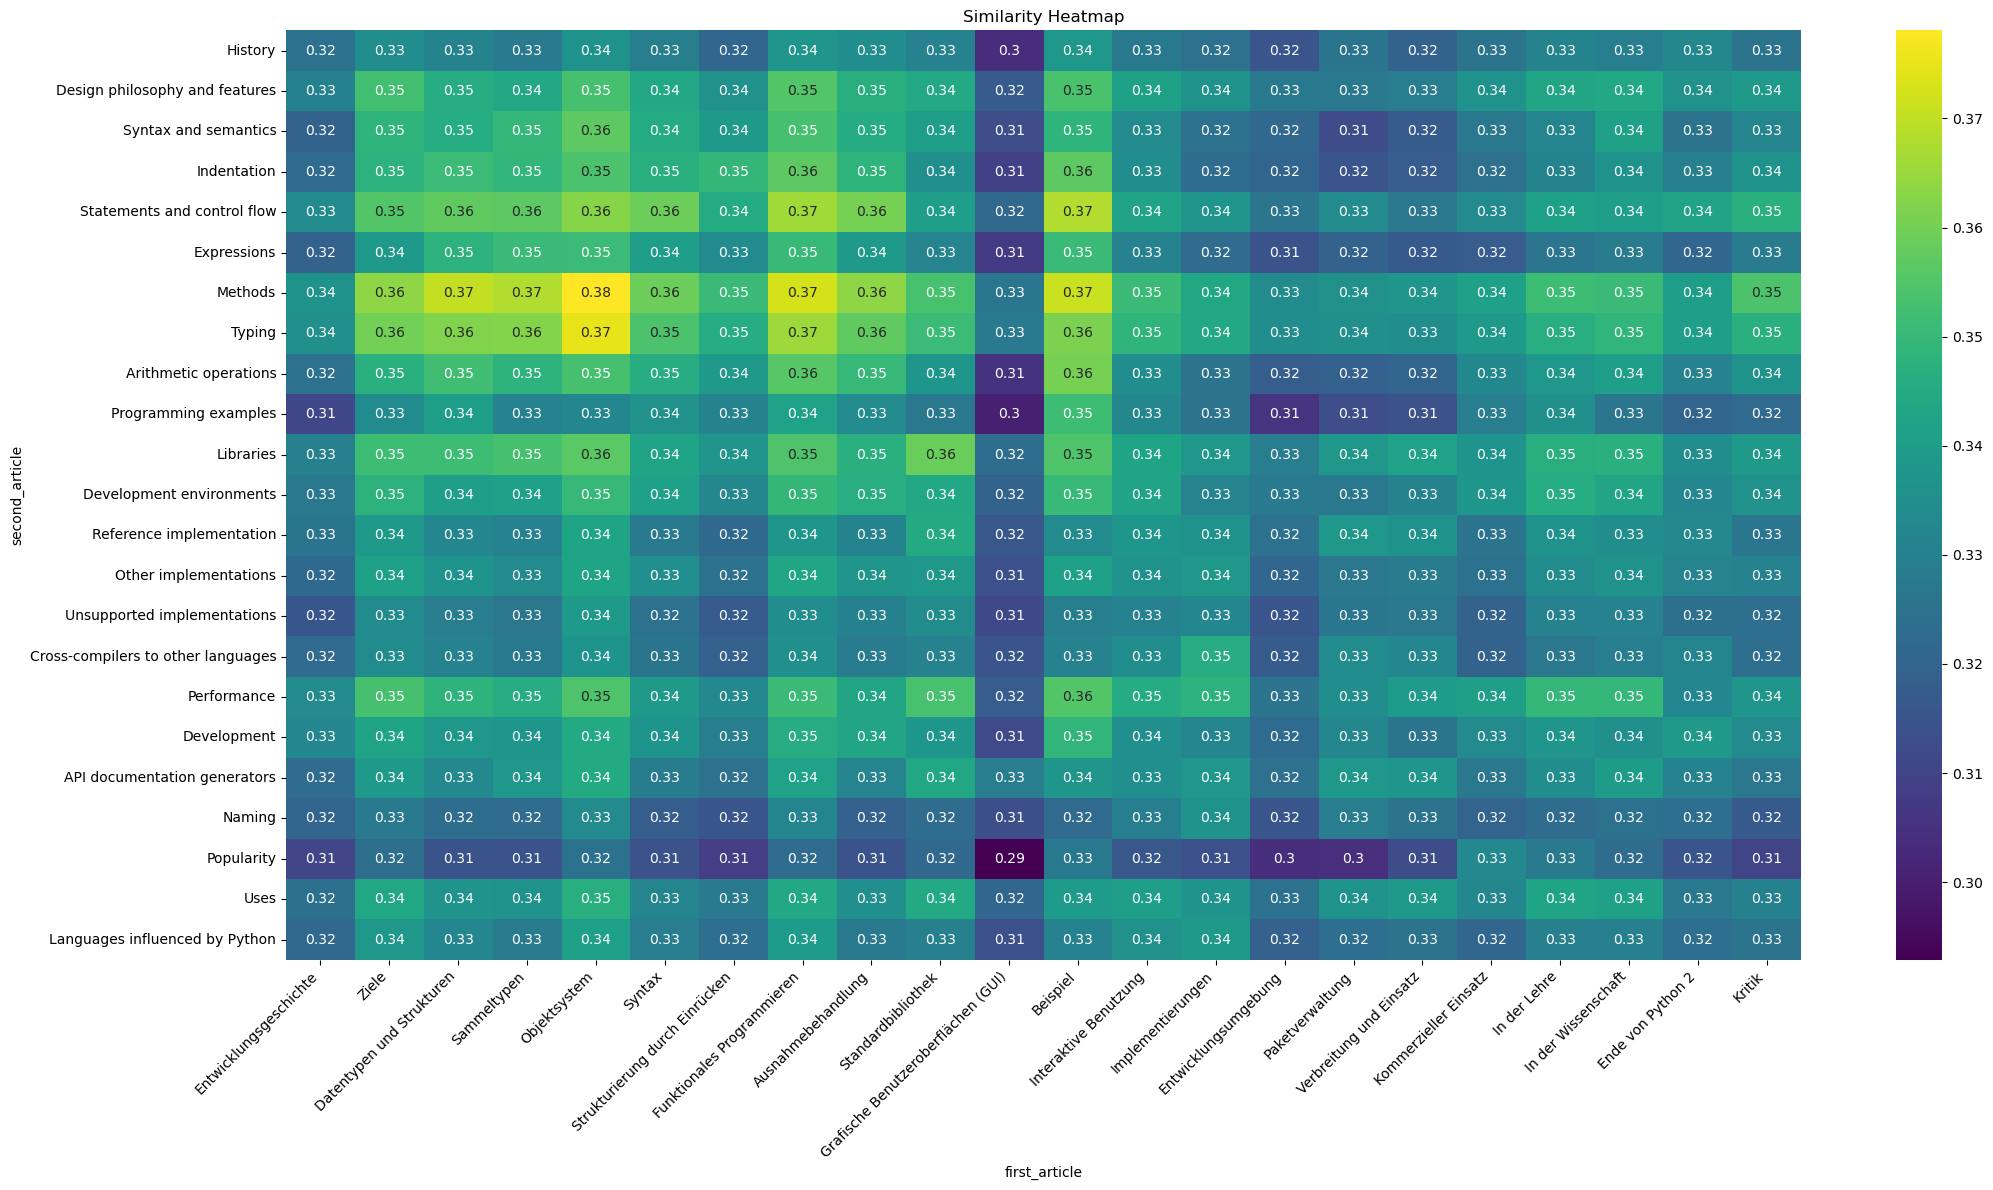

['Entwicklungsgeschichte', 'Ziele', 'Datentypen und Strukturen', 'Sammeltypen', 'Objektsystem', 'Syntax', 'Strukturierung durch Einrücken', 'Funktionales Programmieren', 'Ausnahmebehandlung', 'Standardbibliothek', 'Grafische Benutzeroberflächen (GUI)', 'Beispiel', 'Interaktive Benutzung', 'Implementierungen', 'Entwicklungsumgebung', 'Paketverwaltung', 'Verbreitung und Einsatz', 'Kommerzieller Einsatz', 'In der Lehre', 'In der Wissenschaft', 'Ende von Python 2', 'Kritik']


In [27]:
result_pyth_de_en_simple_cos_sent_fast_text = get_similarity_matrix_with_simple_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, fasttext_service, "subsets_to_subsets", "word-wise")


In [28]:
result_pyth_de_en_simple_cos_sent_fast_text

([('Methods', 'Objektsystem', 0.3780812621116638),
  ('Typing', 'Objektsystem', 0.3749651312828064),
  ('Statements and control flow', 'Beispiel', 0.3677920401096344)],
 [('Popularity', 'Kommerzieller Einsatz', 0.33284226059913635),
  ('Naming', 'Implementierungen', 0.3361670970916748),
  ('History', 'Beispiel', 0.33813968300819397)])

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


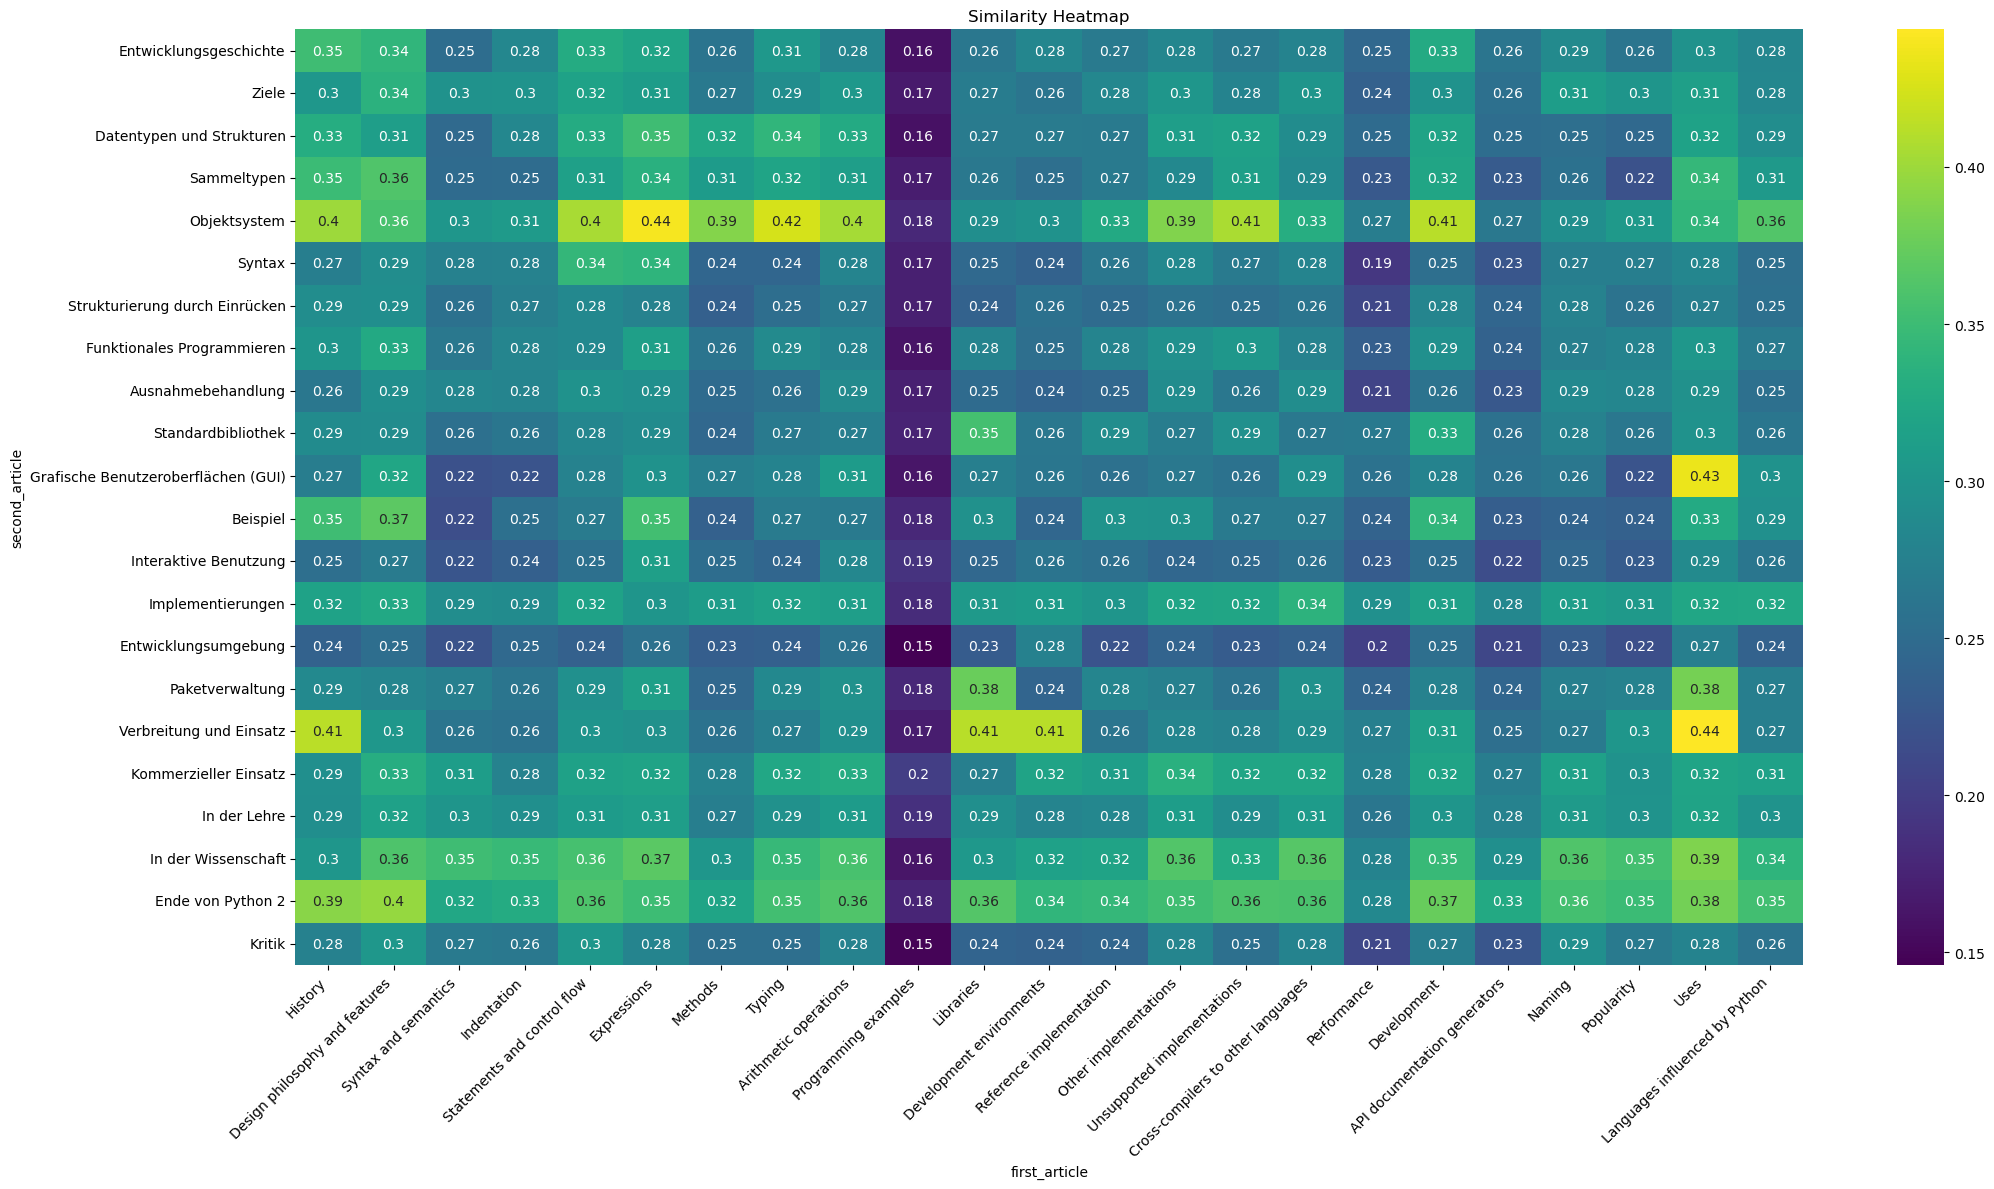

['History', 'Design philosophy and features', 'Syntax and semantics', 'Indentation', 'Statements and control flow', 'Expressions', 'Methods', 'Typing', 'Arithmetic operations', 'Programming examples', 'Libraries', 'Development environments', 'Reference implementation', 'Other implementations', 'Unsupported implementations', 'Cross-compilers to other languages', 'Performance', 'Development', 'API documentation generators', 'Naming', 'Popularity', 'Uses', 'Languages influenced by Python']


In [29]:
result_pyth_de_en_pca_pairwise_sent_fast_text = get_similarity_matrix_with_PCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, fasttext_service, 0.5, "pairwise", "subsets_to_subsets", "word-wise")


In [30]:
result_pyth_de_en_pca_pairwise_sent_fast_text

([('Verbreitung und Einsatz', 'Uses', 0.4438207447528839),
  ('Objektsystem', 'Expressions', 0.44000494480133057),
  ('Grafische Benutzeroberflächen (GUI)', 'Uses', 0.4345853626728058)],
 [('Entwicklungsumgebung', 'Development environments', 0.27546265721321106),
  ('Strukturierung durch Einrücken',
   'Design philosophy and features',
   0.2918687164783478),
  ('Ausnahmebehandlung', 'Statements and control flow', 0.2965642511844635)])

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


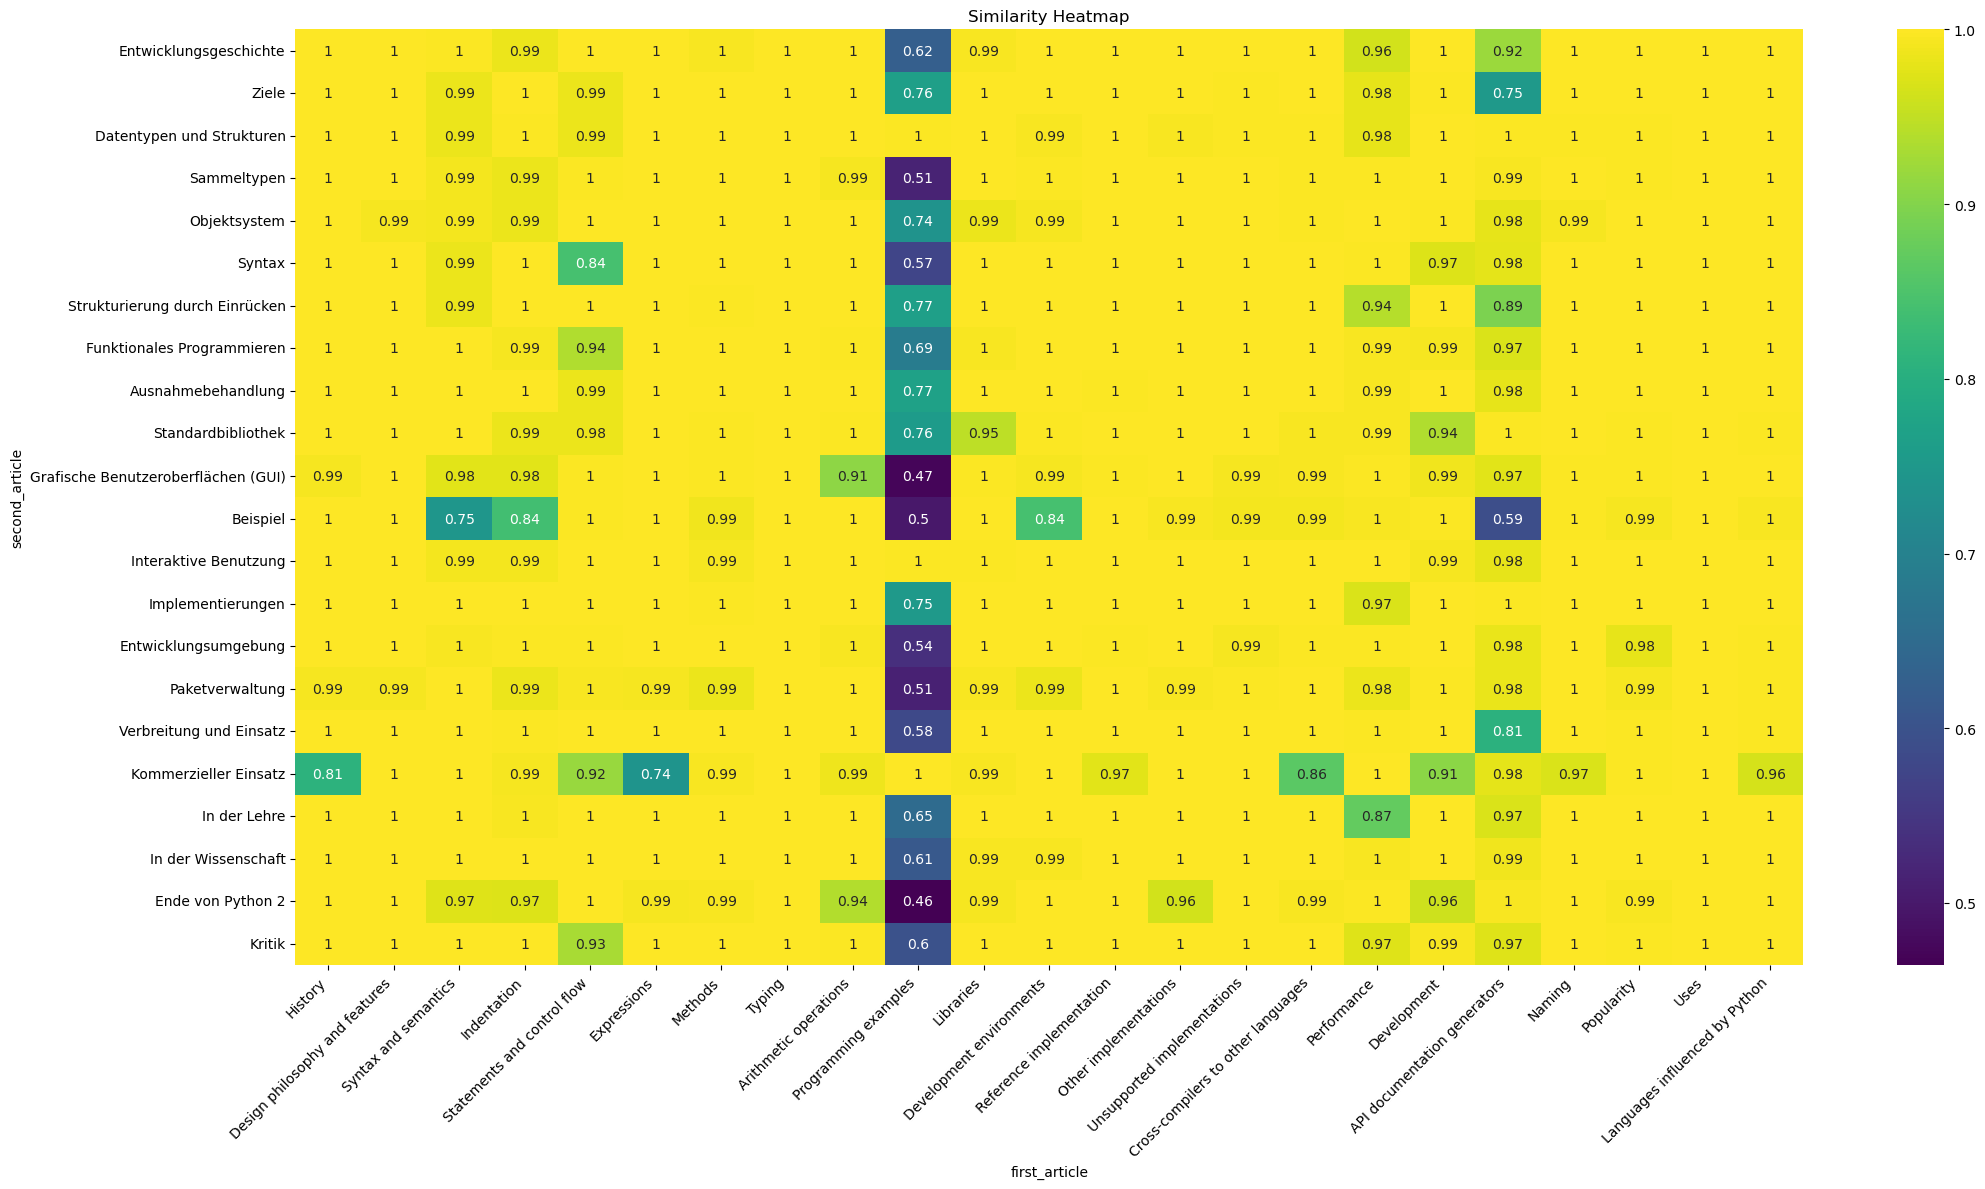

['History', 'Design philosophy and features', 'Syntax and semantics', 'Indentation', 'Statements and control flow', 'Expressions', 'Methods', 'Typing', 'Arithmetic operations', 'Programming examples', 'Libraries', 'Development environments', 'Reference implementation', 'Other implementations', 'Unsupported implementations', 'Cross-compilers to other languages', 'Performance', 'Development', 'API documentation generators', 'Naming', 'Popularity', 'Uses', 'Languages influenced by Python']


In [31]:
result_pyth_de_en_cca_paarwise_sent = get_similarity_matrix_with_CCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, fasttext_service, 0.5, "pairwise", "subsets_to_subsets", "word-wise", True)



In [32]:
result_pyth_de_en_cca_paarwise_sent

([('Ausnahmebehandlung', 'Uses', 1.0000290870666504),
  ('Datentypen und Strukturen', 'Uses', 1.0000149011611938),
  ('Entwicklungsgeschichte', 'Uses', 1.0000098943710327)],
 [('Kommerzieller Einsatz', 'Uses', 0.999635636806488),
  ('In der Wissenschaft',
   'Design philosophy and features',
   0.9998692274093628),
  ('Standardbibliothek',
   'Design philosophy and features',
   0.9999125599861145)])

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl
dimension of the sim matrix:  torch.Size([23, 22])


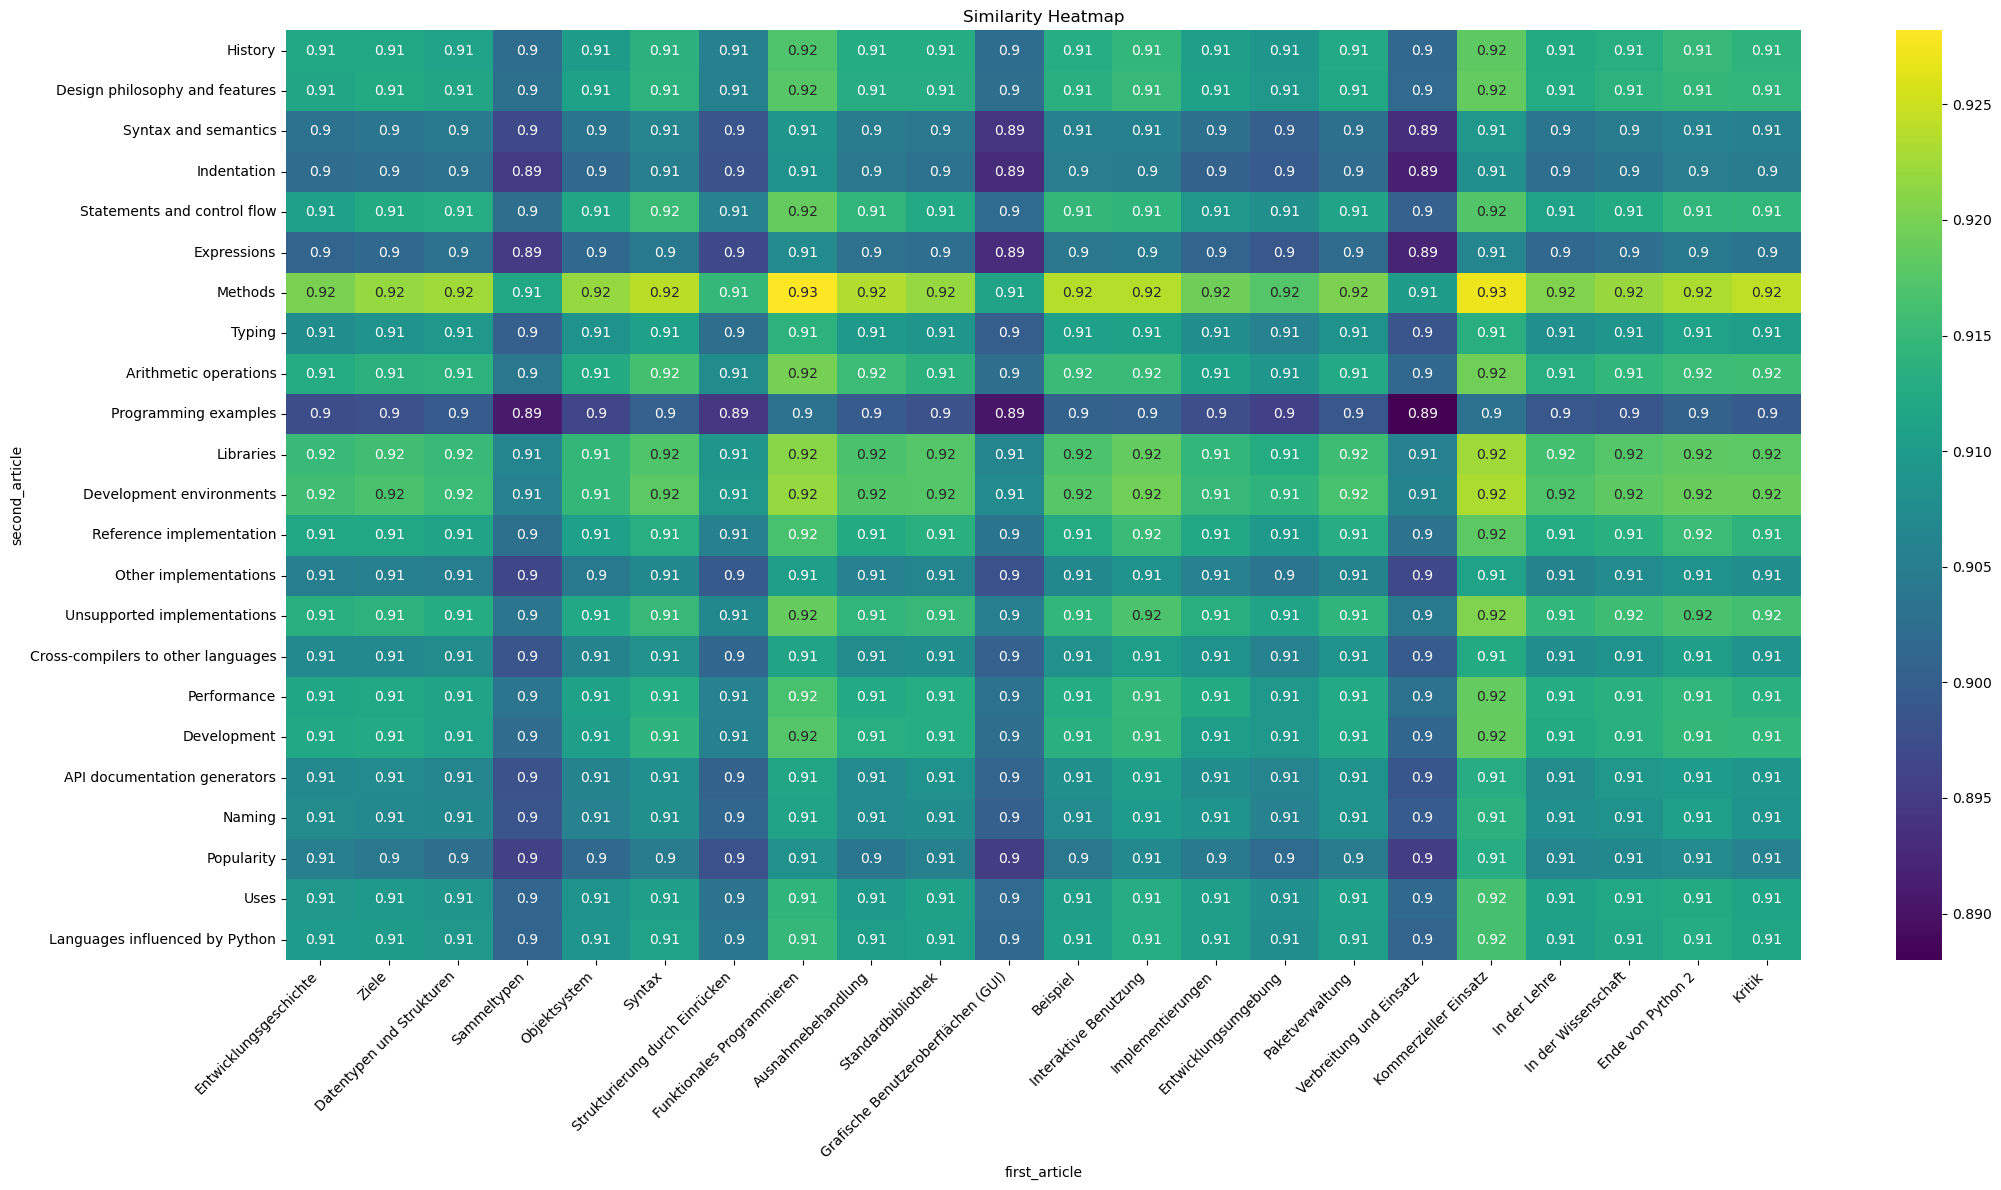

['Entwicklungsgeschichte', 'Ziele', 'Datentypen und Strukturen', 'Sammeltypen', 'Objektsystem', 'Syntax', 'Strukturierung durch Einrücken', 'Funktionales Programmieren', 'Ausnahmebehandlung', 'Standardbibliothek', 'Grafische Benutzeroberflächen (GUI)', 'Beispiel', 'Interaktive Benutzung', 'Implementierungen', 'Entwicklungsumgebung', 'Paketverwaltung', 'Verbreitung und Einsatz', 'Kommerzieller Einsatz', 'In der Lehre', 'In der Wissenschaft', 'Ende von Python 2', 'Kritik']


In [33]:
result_pyth_de_en_simple_cos_sent_bert = get_similarity_matrix_with_simple_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, bert_service, "subsets_to_subsets", "word-wise")


In [34]:
result_pyth_de_en_simple_cos_sent_bert

([('Methods', 'Funktionales Programmieren', 0.9282040596008301),
  ('Development environments', 'Kommerzieller Einsatz', 0.9232855439186096),
  ('Libraries', 'Kommerzieller Einsatz', 0.9224275946617126)],
 [('Programming examples', 'Kommerzieller Einsatz', 0.9030333161354065),
  ('Expressions', 'Funktionales Programmieren', 0.9070526361465454),
  ('Indentation', 'Funktionales Programmieren', 0.9083327651023865)])

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


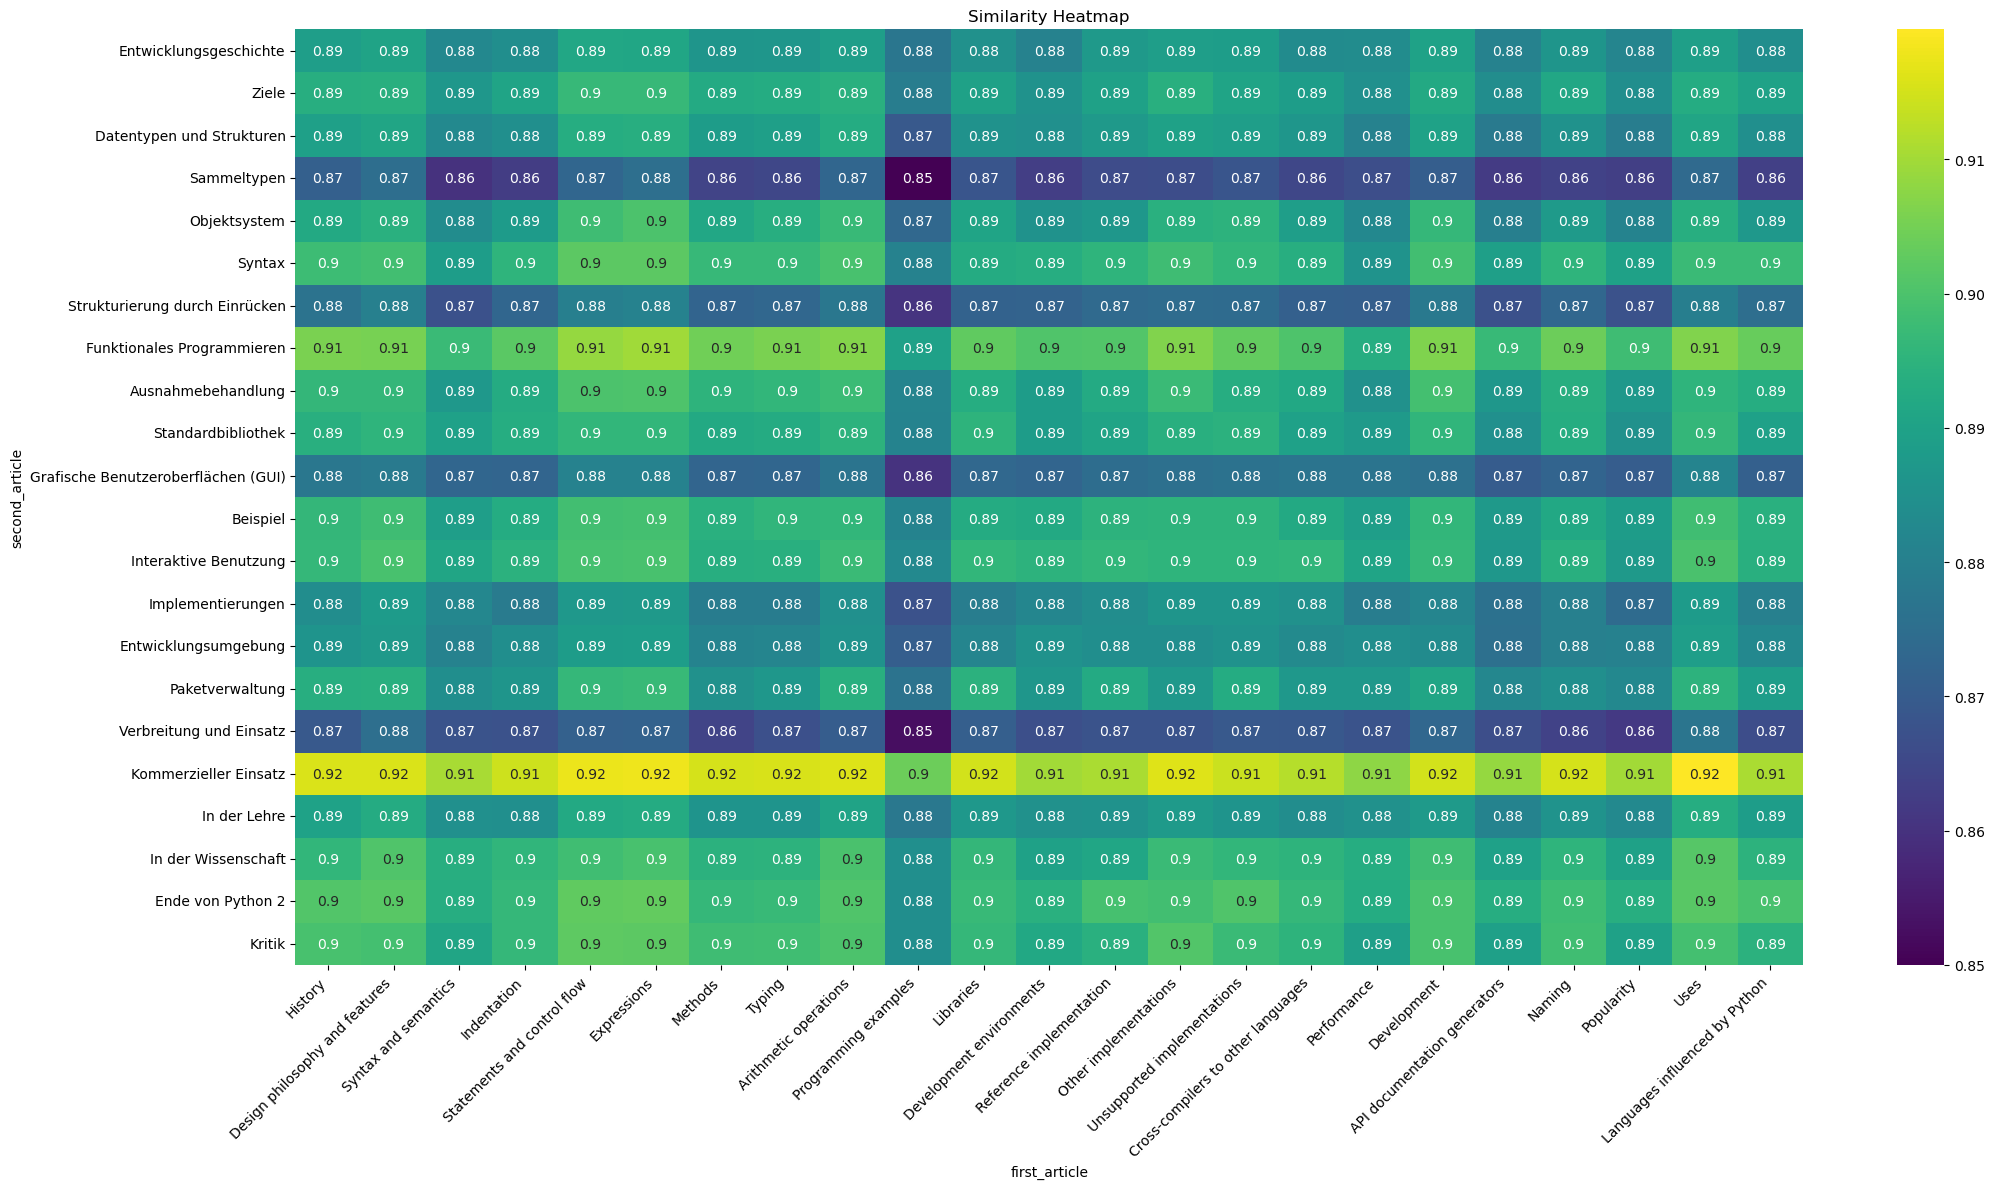

['History', 'Design philosophy and features', 'Syntax and semantics', 'Indentation', 'Statements and control flow', 'Expressions', 'Methods', 'Typing', 'Arithmetic operations', 'Programming examples', 'Libraries', 'Development environments', 'Reference implementation', 'Other implementations', 'Unsupported implementations', 'Cross-compilers to other languages', 'Performance', 'Development', 'API documentation generators', 'Naming', 'Popularity', 'Uses', 'Languages influenced by Python']


In [35]:
result_pyth_de_en_pca_pairwise_sent_bert = get_similarity_matrix_with_PCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, bert_service, 0.5, "pairwise", "subsets_to_subsets", "word-wise")


In [36]:
result_pyth_de_en_pca_pairwise_sent_bert

([('Kommerzieller Einsatz', 'Uses', 0.9196782112121582),
  ('Funktionales Programmieren', 'Expressions', 0.9097156524658203),
  ('Ende von Python 2', 'Expressions', 0.9028822183609009)],
 [('Sammeltypen', 'Expressions', 0.8750563263893127),
  ('Verbreitung und Einsatz', 'Uses', 0.8771482110023499),
  ('Strukturierung durch Einrücken', 'Expressions', 0.8805623650550842)])

caching the fileEntwicklungsgeschichte-Zielesubset_to_subset.pkl
caching the fileHistory-Design philosophy and featuressubset_to_subset.pkl


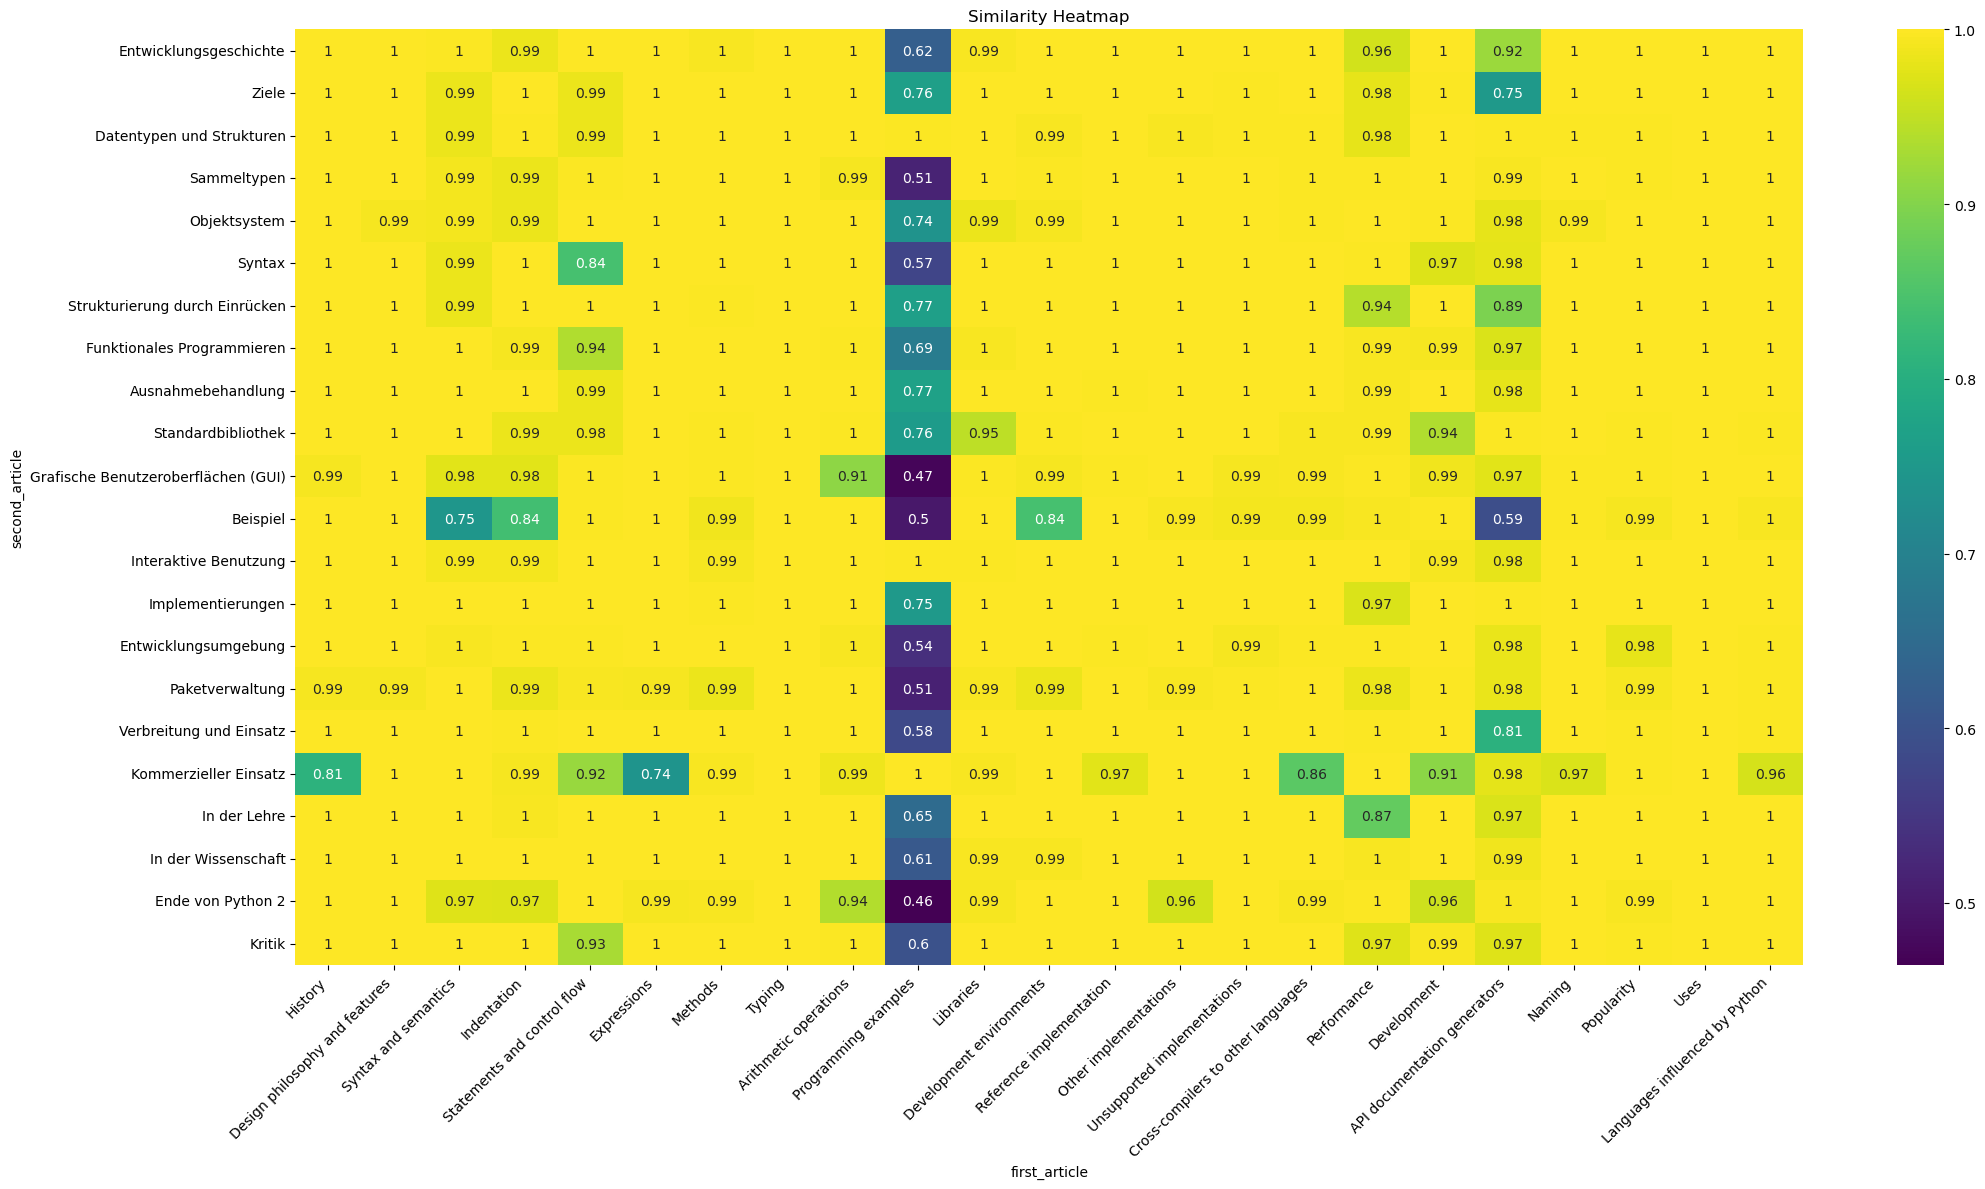

['History', 'Design philosophy and features', 'Syntax and semantics', 'Indentation', 'Statements and control flow', 'Expressions', 'Methods', 'Typing', 'Arithmetic operations', 'Programming examples', 'Libraries', 'Development environments', 'Reference implementation', 'Other implementations', 'Unsupported implementations', 'Cross-compilers to other languages', 'Performance', 'Development', 'API documentation generators', 'Naming', 'Popularity', 'Uses', 'Languages influenced by Python']


In [37]:
result_pyth_de_en_cca_paarwise_BERT = get_similarity_matrix_with_CCA_comparator("Python (Programmiersprache)", "Python (programming language)", 'de', 'en', 'en', translator_de_en, fasttext_service, 0.5, "pairwise", "subsets_to_subsets", "word-wise", True)



In [ ]:
result_pyth_de_en_cca_paarwise_BERT

mettrie is not in model
ijcai is not in model
lsi is not in model
asimo is not in model
approximators is not in model
alphago is not in model
chatgpt is not in model
cleverbot is not in model
deepl is not in model
pdas is not in model
cortana is not in model
bixby is not in model
findface is not in model
deepfakes is not in model
cortana is not in model
waymo is not in model
asimo is not in model
mckinsey is not in model
fakhrizadeh is not in model
zalando is not in model
npcs is not in model
alphago is not in model
deepmind is not in model
sedol is not in model
alphazero is not in model
deepmind is not in model
edvard is not in model
ornella is not in model
ayerle is not in model
fellini is not in model
frederico is not in model
fellini is not in model
fellini is not in model
belamy is not in model
portraitresearch is not in model
thoutt is not in model
sunspring is not in model
taryn is not in model
jukedeck is not in model
alwaysmusicians is not in model
skygge is not in model
matth

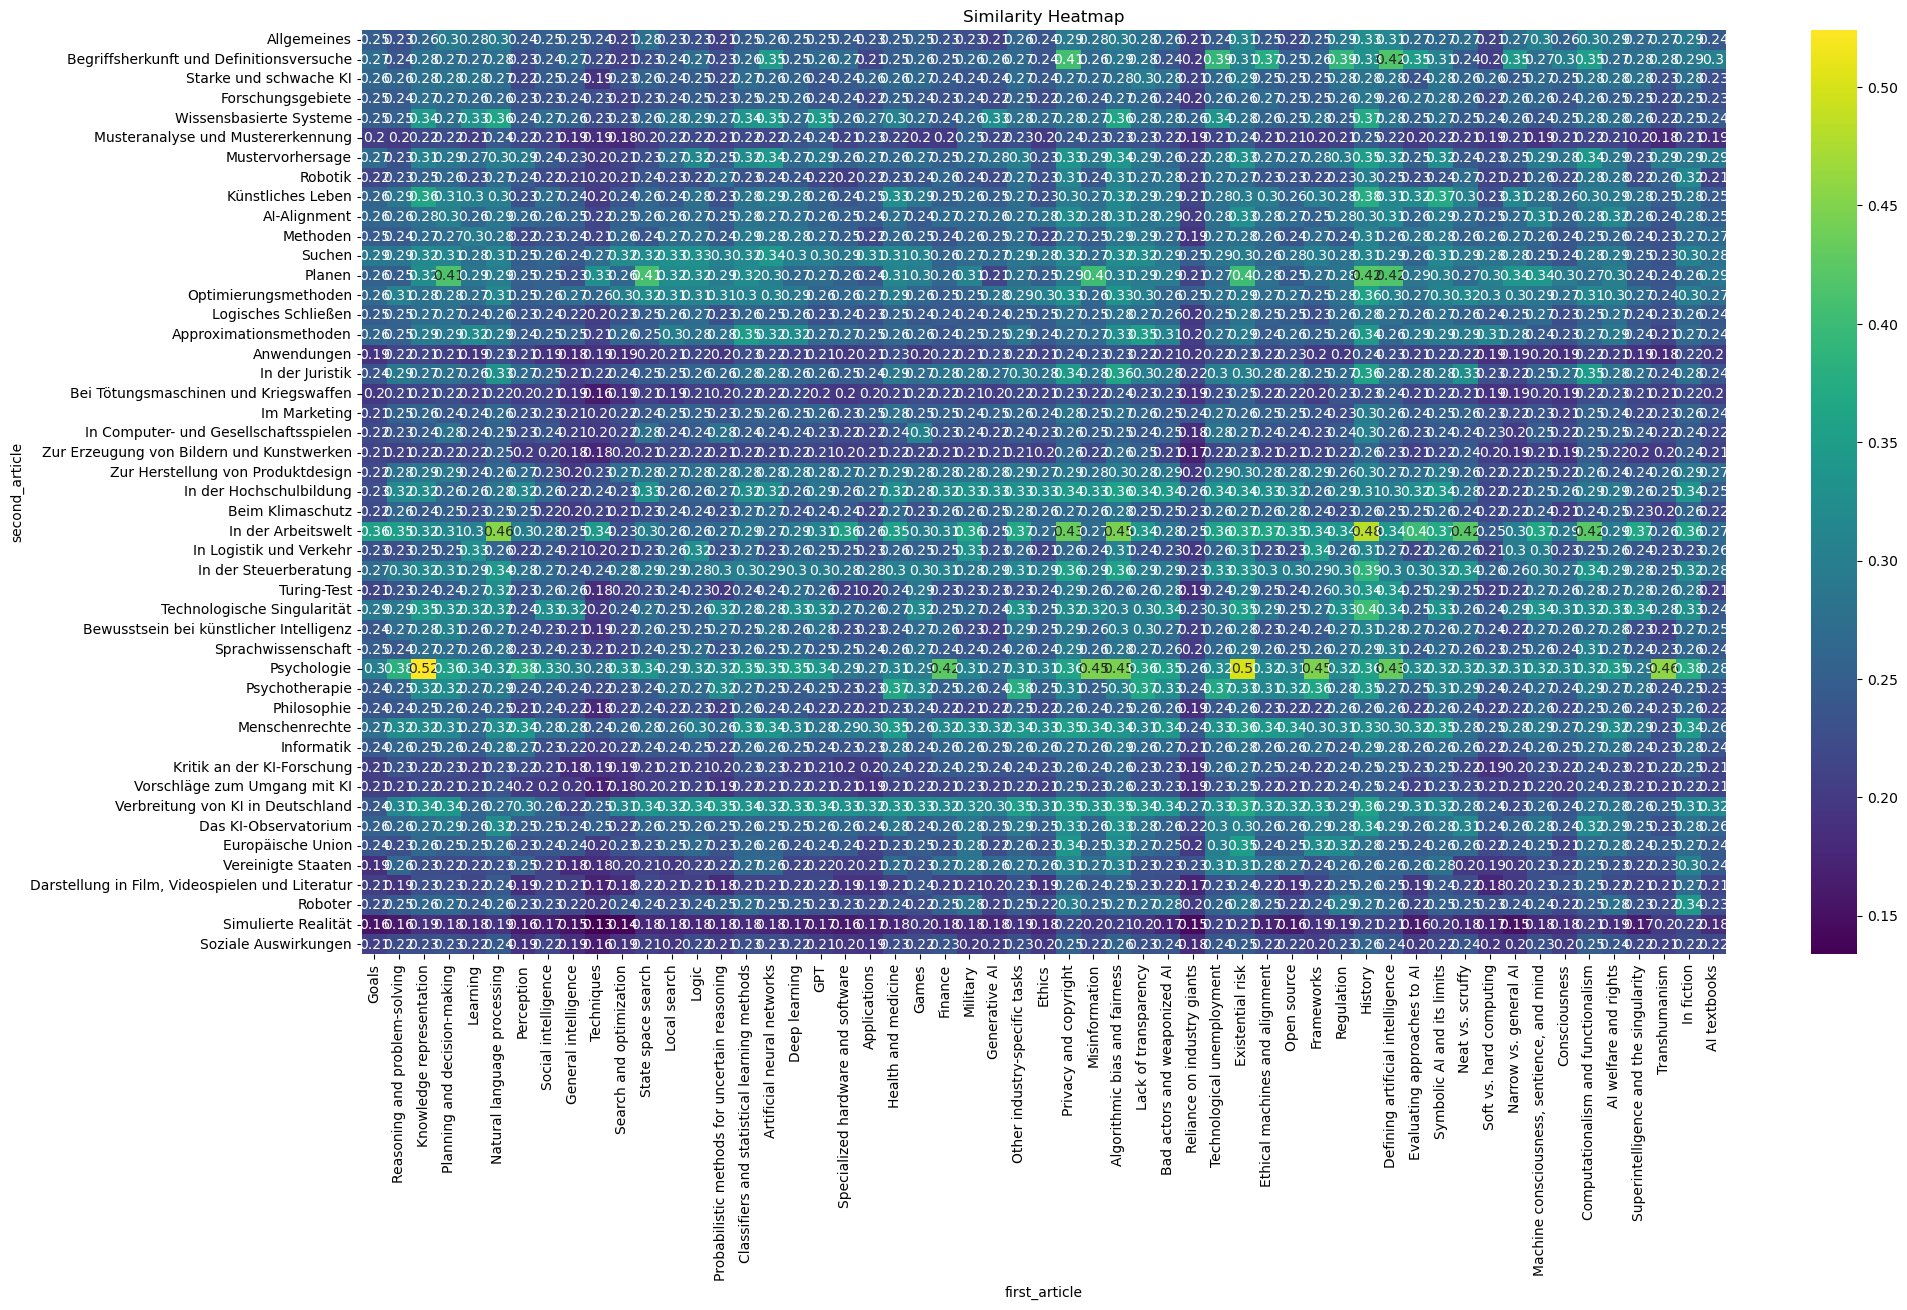

['Goals', 'Reasoning and problem-solving', 'Knowledge representation', 'Planning and decision-making', 'Learning', 'Natural language processing', 'Perception', 'Social intelligence', 'General intelligence', 'Techniques', 'Search and optimization', 'State space search', 'Local search', 'Logic', 'Probabilistic methods for uncertain reasoning', 'Classifiers and statistical learning methods', 'Artificial neural networks', 'Deep learning', 'GPT', 'Specialized hardware and software', 'Applications', 'Health and medicine', 'Games', 'Finance', 'Military', 'Generative AI', 'Other industry-specific tasks', 'Ethics', 'Privacy and copyright', 'Misinformation', 'Algorithmic bias and fairness', 'Lack of transparency', 'Bad actors and weaponized AI', 'Reliance on industry giants', 'Technological unemployment', 'Existential risk', 'Ethical machines and alignment', 'Open source', 'Frameworks', 'Regulation', 'History', 'Defining artificial intelligence', 'Evaluating approaches to AI', 'Symbolic AI and i

In [20]:
result_pyth_de_en_pca_pairwise = get_similarity_matrix_with_PCA_comparator("Künstliche Intelligenz", "Artificial intelligence", 'de', 'en', 'en', translator_de_en, sentence_transformer_service, 0.5, "pairwise", "subsets_to_subsets", "sentence-wise")


In [8]:
result_monty_python_de_en_pca_pairwise = get_similarity_matrix_with_PCA_comparator("Monty Python", "Monty Python", 'en', 'de', 'en', translator_de_en, sentence_transformer_service, 0.5, "pairwise", "subsets_to_subsets", "sentence-wise")


caching the fileBefore-Flying-Circus-Development-of-the-seriessubset_to_subset.pkl
caching the fileEntstehung-und-Geschichte-Deutschsprachige Literatursubset_to_subset.pkl


['Entstehung-und-Geschichte', 'Deutschsprachige Literatur', 'DVD- & Blu-ray-Veröffentlichungen in Deutschland', 'Rezeption']
